In [1]:

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 9.6 MB/s  eta 0:00:01
  Created wheel for folium: file

In [2]:
pip install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import itertools

In [4]:
#Wikipage with list of the neighborhoods
URL = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto'
page = requests.get(URL)

In [5]:
soup=BeautifulSoup(page.content, 'html.parser')

In [6]:
Tables= soup.findAll('table',{"class":"wikitable sortable"})

In [7]:
#Extracting the list of Neighborhoods from soup
Col=[]
Rows=Tables[0].find_all('tr')
for row in range(len(Rows)):
    column=Rows[row].find_all('td')
    try:
        if str(column[1])!="<None></None>":
            Col.append(column[1].text.split(", "))
#             Links=column[1].find_all('a')
#             for link in range(len(Links)):
#                 Col.append(Links[link].text)
    except:
        print("warning")
        


warning


In [8]:
#Cleaning the neighborhood names
Neighborhoods=list(itertools.chain.from_iterable(Col))
for elements in range(len(Neighborhoods)):
    Neighborhoods[elements]=Neighborhoods[elements].strip('\n')
    Neighborhoods[elements]=Neighborhoods[elements].strip('\t')

In [9]:
Neighborhoods

['Downtown',
 'Harbourfront',
 'Little Italy',
 'Little Portugal',
 'Dufferin Grove',
 'Palmerston',
 'University',
 'Bay Street Corridor',
 'Kensington Market',
 'Chinatown',
 'Trinity Bellwoods',
 'South Niagara',
 'Island airport',
 'The Islands',
 'waterfront communities C1',
 "Queen's Park",
 'Ontario Provincial Government',
 'Victoria Hotel',
 'Central Bay Street',
 'First Canadian Place',
 'Design Exchange',
 'Adelaide',
 'University of Toronto',
 'Union Station',
 'The Annex',
 'Yorkville',
 'South Hill',
 'Summerhill',
 'Wychwood Park',
 'Deer Park',
 'Casa Loma',
 'Forest Hill South',
 'Oakwood–Vaughan',
 'Humewood–Cedarvale',
 'Corso Italia',
 'Forest Hill Road Park',
 'Bedford Park',
 'Lawrence Manor',
 'North Toronto',
 'Forest Hill North',
 'Lawrence Park',
 'Lawrence Heights',
 'Roselawn',
 'North York',
 'Clanton Park',
 'Bathurst Manor',
 'Willowdale West',
 'Newtonbrook West',
 'Westminster–Branson',
 'Lansing-Westgate',
 'Cabbagetown',
 'St. Lawrence Market',
 'Toron

In [10]:
#Getting coordinates of the neighborhoods

In [11]:
geolocator = Nominatim(user_agent="torronto_explorer")

In [12]:
neighborhood_df= pd.DataFrame(columns=['neighborhood', 'latitude', 'longitude'])

In [13]:
for row in range(len(Neighborhoods)):
    address="Canada Toronto "+ Neighborhoods[row]
    location= geolocator.geocode(address)
    try:
        neighborhood_df=neighborhood_df.append({'neighborhood': Neighborhoods[row], 'latitude': location.latitude, 'longitude': location.longitude }, ignore_index=True)
    except:
        print('warning, could not find '+ address)
print('A total of ' + str(neighborhood_df.shape[0]/len(Neighborhoods)) + ' of all neighborhoods listed in wikipedia were found.')

warning, could not find Canada Toronto Bay Street Corridor
warning, could not find Canada Toronto waterfront communities C1
warning, could not find Canada Toronto Ontario Provincial Government
warning, could not find Canada Toronto Westminster–Branson
warning, could not find Canada Toronto Parkwoods–Donalda
warning, could not find Canada Toronto Blake-Jones
warning, could not find Canada Toronto South Central Letter Processing Plant Toronto
warning, could not find Canada Toronto Broadview North (Old East York)
warning, could not find Canada Toronto Tam O'Shanter – Sullivan
warning, could not find Canada Toronto Eglinton East (Knob Hill)
warning, could not find Canada Toronto Bendale (Cedarbrae)
warning, could not find Canada Toronto Port Union (Centennial Scarborough)
warning, could not find Canada Toronto The Junction (Junction Area)
warning, could not find Canada Toronto Rockcliffe–Smythe
warning, could not find Canada Toronto Weston-Pellam Park
warning, could not find Canada Toronto

In [14]:
#Toronto location
Toronto_center=geolocator.geocode("Toronto Canada")

In [45]:
#Map of Toronto with the location of the center of the neighborhoods
map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)
for lat, lng, label in zip(neighborhood_df['latitude'], neighborhood_df['longitude'], neighborhood_df['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [16]:
neighborhood_df.append({'neighborhood':Neighborhoods[row], 'latitude':location.latitude, 'longitude':location.longitude }, ignore_index=True)

,neighborhood,latitude,longitude
0,Downtown,43.656322,-79.380916
1,Harbourfront,43.640080,-79.380150
2,Little Italy,43.655208,-79.414877
3,Little Portugal,43.647413,-79.431116
4,Dufferin Grove,43.653632,-79.426439
...,...,...,...
183,Rexdale,43.721362,-79.565513
184,Clairville,43.722563,-79.597039
185,West Humber - Clairville,43.722563,-79.597039
186,Mount Olive,43.652384,-79.383568


In [17]:
# Retrieving data from 4square

In [47]:
# The code was removed by Watson Studio for sharing.

In [19]:
#Retrieving neighborhood name, category and geo position of the venues
All_venues=pd.DataFrame(columns=['neighborhood','name','categories','lat','lng']);
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
for row in neighborhood_df.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row[1]['latitude'], 
    row[1]['longitude'], 
    radius, 
    LIMIT)
    results = requests.get(url).json()
    items=results['response']['groups'][0]['items']
    if items!=[]:
        venues=pd.json_normalize(items)
        venues_filt=venues[filtered_columns]
        for row2 in venues_filt.iterrows():
            venues_filt['venue.categories'][row2[0]]=venues_filt['venue.categories'][row2[0]][0]['name']
        venues_filt.columns = [col.split(".")[-1] for col in venues_filt.columns]
        venues_filt['neighborhood']=row[1]['neighborhood']
        All_venues=pd.concat([All_venues,venues_filt])
All_venues.reset_index(inplace=True) 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [20]:
All_venues

,index,neighborhood,name,categories,lat,lng
0,0,Downtown,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,1,Downtown,Blaze Pizza,Pizza Place,43.656518,-79.380015
2,2,Downtown,Silver Snail Comics,Comic Shop,43.657031,-79.381403
3,3,Downtown,Burrito Boyz,Burrito Place,43.656265,-79.378343
4,4,Downtown,Yonge-Dundas Square,Plaza,43.656054,-79.380495
...,...,...,...,...,...,...
4070,25,Mount Olive,Tachi,Sushi Restaurant,43.650596,-79.383396
4071,26,Mount Olive,GoodLife Fitness Toronto 137 Yonge Street,Gym,43.651242,-79.378068
4072,27,Mount Olive,Ninki Izakaya,Japanese Restaurant,43.650228,-79.384863
4073,28,Mount Olive,Rolltation,Japanese Restaurant,43.654918,-79.387424


In [21]:
#Grouping venues by neighborhoods
All_venues.groupby(['neighborhood']).count()

,index,name,categories,lat,lng
neighborhood,,,,,
Adelaide,30,30,30,30,30
Agincourt,18,18,18,18,18
Alderwood,11,11,11,11,11
Baby Point,14,14,14,14,14
Banbury,1,1,1,1,1
...,...,...,...,...,...
York Mills West,17,17,17,17,17
York University,27,27,27,27,27
York University Heights,15,15,15,15,15


In [22]:
#Binary category of venues/ Preparation for clustering
category_bin=pd.get_dummies(All_venues['categories'])

In [23]:
category_bin['neighborhood']=All_venues['neighborhood']
category_bin=category_bin[['neighborhood'] + list(category_bin.columns[:-1])]
category_bin

,neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4071,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4072,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4073,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Frequency of venue types per neighborhood
frequency_neigh=category_bin.groupby('neighborhood').mean()

In [25]:
frequency_neigh

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
neighborhood,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Baby Point,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Banbury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
York University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
York University Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [28]:
#top 5 most frequent venue categories per neighborhood
top5=pd.DataFrame(columns=['neighborhood', '1', '2', '3', '4', '5'])
for row in frequency_neigh.iterrows():
    List=row[1].sort_values(ascending=False)
    try:
        top5=top5.append({'neighborhood':row[0], '1':List.index[1], '2':List.index[2],'3':List.index[3],'4':List.index[4],'5':List.index[5]}, ignore_index=True)
    except:
        pass
top5

,neighborhood,1,2,3,4,5
0,Adelaide,Restaurant,Gym,Coffee Shop,Theater,Art Gallery
1,Agincourt,Asian Restaurant,Food Court,Hong Kong Restaurant,Coffee Shop,Karaoke Bar
2,Alderwood,Convenience Store,Pub,Donut Shop,Sandwich Place,Skating Rink
3,Baby Point,Pizza Place,Spa,Metro Station,Italian Restaurant,Event Space
4,Banbury,Zoo Exhibit,Escape Room,Donut Shop,Dry Cleaner,Dumpling Restaurant
...,...,...,...,...,...,...
180,York Mills West,Coffee Shop,Deli / Bodega,Sandwich Place,Burrito Place,Park
181,York University,Café,Restaurant,Pub,Japanese Restaurant,Athletics & Sports
182,York University Heights,Pizza Place,Restaurant,Grocery Store,Bar,Shopping Mall
183,Yorkdale,Bookstore,Furniture / Home Store,Restaurant,Toy / Game Store,Shopping Mall


In [ ]:
# K-means Clustering!

In [29]:
from sklearn.cluster import KMeans
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [35]:
#Selecting the number of clusters of the Kmeans by analysing the mean distance between the elements of a cluster and its centroid
temp=[];
temp2=[];
for ncluster in range(2,20):
    try:
        frequency_neigh=frequency_neigh.drop('labels',1)
    except:
        pass
    kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(frequency_neigh)
    frequency_neigh['labels']=kmeans.labels_
    for row in frequency_neigh.iterrows():
        temp.append((sum((kmeans.cluster_centers_[int(row[1]['labels'])]- row[1][:-1])**2)))
    temp2.append(sum(temp)/len(temp))

Text(0, 0.5, 'Mean squared error')

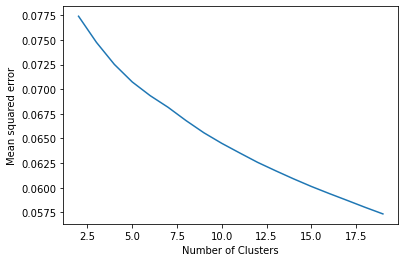

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(2,20),temp2)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean squared error')

In [37]:
#I guess the knee is around 5 clusters... So thats the number I chose.
ncluster=5
cluster_df=frequency_neigh.drop('labels',1)
kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(cluster_df)
frequency_neigh['labels']=kmeans.labels_

In [38]:
# set color scheme for the clusters
x = np.arange(ncluster)
ys = [i + x + (i*x)**2 for i in range(ncluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood_df['latitude'], neighborhood_df['longitude'], neighborhood_df['neighborhood'],frequency_neigh['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto


In [39]:
top5['labels']=kmeans.labels_

In [40]:
#Displaying neighborhoods of cluster 0 and the top 5 categories for each neighborhood
top5[top5['labels']==0]

,neighborhood,1,2,3,4,5,labels
2,Alderwood,Convenience Store,Pub,Donut Shop,Sandwich Place,Skating Rink,0
3,Baby Point,Pizza Place,Spa,Metro Station,Italian Restaurant,Event Space,0
5,Bathurst Manor,Playground,Men's Store,Health & Beauty Service,Baseball Field,Park,0
11,Birch Cliff,College Stadium,Thai Restaurant,Skating Rink,Park,Café,0
27,Cliffcrest,Pizza Place,Park,Sandwich Place,Discount Store,Auto Garage,0
28,Cliffside,Park,Sandwich Place,Sushi Restaurant,Grocery Store,Pub,0
40,Don Valley Village,Sandwich Place,Pizza Place,Bank,Park,Sports Bar,0
43,Downsview,Pizza Place,American Restaurant,Gas Station,French Restaurant,Café,0
47,East York,Ice Cream Shop,Sandwich Place,Plaza,Pastry Shop,Pub,0
48,Eglinton West,Grocery Store,Caribbean Restaurant,Park,Coffee Shop,Gift Shop,0


In [41]:
#Displaying neighborhoods of cluster 1 and the top 5 categories for each neighborhood
top5[top5['labels']==1]

,neighborhood,1,2,3,4,5,labels
4,Banbury,Zoo Exhibit,Escape Room,Donut Shop,Dry Cleaner,Dumpling Restaurant,1
7,Bayview Woods-Steeles,Sandwich Place,Bank,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,1
25,Clanton Park,Women's Store,Fast Food Restaurant,Bus Station,Zoo Exhibit,Dry Cleaner,1
78,Lansing-Westgate,Dog Run,Spa,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,1


In [ ]:
#Displaying neighborhoods of cluster 2 and the top 5 categories for each neighborhood
top5[top5['labels']==2]

In [42]:
#Displaying neighborhoods of cluster 3 and the top 5 categories for each neighborhood
top5[top5['labels']==3]

,neighborhood,1,2,3,4,5,labels
1,Agincourt,Asian Restaurant,Food Court,Hong Kong Restaurant,Coffee Shop,Karaoke Bar,3
9,Beechborough,Furniture / Home Store,Fast Food Restaurant,Pet Service,Grocery Store,Convenience Store,3
17,Cedarbrae,Coffee Shop,Pizza Place,Discount Store,Pub,Toy / Game Store,3
23,Clairlea,Park,Restaurant,Grocery Store,Ice Cream Shop,Sandwich Place,3
24,Clairville,Swiss Restaurant,Gas Station,Sandwich Place,Chinese Restaurant,Restaurant,3
26,Clarks Corners,Caribbean Restaurant,Vietnamese Restaurant,Gas Station,Intersection,Shopping Mall,3
31,Crescent Town,Pet Store,Golf Course,Shopping Mall,Liquor Store,Sushi Restaurant,3
41,Dorset Park,Indian Restaurant,Electronics Store,Restaurant,Indian Chinese Restaurant,Intersection,3
49,Emery,Vietnamese Restaurant,Fast Food Restaurant,Hockey Arena,Asian Restaurant,Pizza Place,3
56,Glen Park,Grocery Store,Ice Cream Shop,Latin American Restaurant,Asian Restaurant,Coffee Shop,3


In [43]:
#Displaying neighborhoods of cluster 0 and the top 4 categories for each neighborhood
top5[top5['labels']==4]

,neighborhood,1,2,3,4,5,labels
0,Adelaide,Restaurant,Gym,Coffee Shop,Theater,Art Gallery,4
6,Bayview Village,Chinese Restaurant,Bank,Café,Toy / Game Store,Italian Restaurant,4
8,Bedford Park,Pub,Restaurant,Pizza Place,Burger Joint,Bakery,4
10,Berczy Park,Farmers Market,Cocktail Bar,Restaurant,Comfort Food Restaurant,Jazz Club,4
12,Birchmount,Bookstore,Sporting Goods Shop,Bank,Park,Coffee Shop,4
...,...,...,...,...,...,...,...
172,Willowdale West,Japanese Restaurant,Burger Joint,Fried Chicken Joint,Gym,Grocery Store,4
177,Wychwood Park,Café,Park,Restaurant,Theater,Event Space,4
181,York University,Café,Restaurant,Pub,Japanese Restaurant,Athletics & Sports,4
183,Yorkdale,Bookstore,Furniture / Home Store,Restaurant,Toy / Game Store,Shopping Mall,4
